In [1]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

# Data in C:\Users\kbs1\Documents\Holder_Carrier_VNA_Measurements NEW

In [2]:
## Data Directory GUI
'''Getting data directory so data can easily be imported '''
def get_dir(new=True):
    '''Opens a window to select directory if new==False gets current directory
    Returns the directory as a string
    '''
    if new==True:
        root = Tk() # Tk() is a function in tkinter that opens a window
        root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
        root.withdraw() # closes the tkinter window since it's unnecessary
        oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
        os.chdir(root.directory) # sets new directory
        newcwd = os.getcwd() # saves new directory name as newcwd
        return root.directory
    if new==False:
        cd=os.getcwd()
        return cd
folder=get_dir()

In [3]:
## Load Data use for .csv data
''' Makes a list of all the files with the extension use * to use for importing'''

path = folder + '/'+'*.csv' # Change '' as needed
file_list=sorted(glob.glob(path))
list(enumerate(file_list)) # list all files and their corresponding index in the list file_list

[(0,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\CHIPANDCARRIERS11.csv'),
 (1,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\CHIPANDCARRIERS111PORT.csv'),
 (2,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\CHIPANDCARRIERS21.csv'),
 (3,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\LCS11SYS.csv'),
 (4,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\LCS12SYS.csv'),
 (5,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\LCS21SYS.csv'),
 (6,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\LCS22SYS.csv'),
 (7,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\SYSS11.csv'),
 (8,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\SYSS12.csV'),
 (9,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\SYSS21.csv'),
 (10,
  'C:/Users/kbs1/Documents/Holder_Carrier_VNA_Measurements NEW\\SYSS22.csv')]

In [4]:
def get_csv(filename):
    return pd.read_csv(filename,sep=',',header=5)

In [5]:
def experiment_df(filenames,plot=False):
    li=[]
    label=[]
    if plot==True:
        plt.figure(figsize=(18,12))
    for fn in filenames:
        df =get_csv(fn)
        cols=df.columns
        if fn ==filenames[0]:
            x=df[cols[0]].iloc[:-1].astype(np.float)/1e9
            li.append(x)
        y=df[cols[1]].iloc[:-1].astype(np.float)
        li.append(y)
        lab=fn.split('\\')[1].split('.')[0]
        label.append(lab)
        if plot==True:
            lab=fn.split('\\')[1].split('.')[0]
            label.append(lab)
            plt.plot(x,y, label=lab)
    if plot==True:  
        plt.legend()
    all_df=pd.DataFrame(li).T
    return all_df,label

In [6]:
all_df,all_lab=experiment_df(file_list)

In [7]:
all_lab.insert(0,'Freq(GHz)')
all_df.columns=all_lab

In [8]:
all_df.head()

,Freq(GHz),CHIPANDCARRIERS11,CHIPANDCARRIERS111PORT,CHIPANDCARRIERS21,LCS11SYS,LCS12SYS,LCS21SYS,LCS22SYS,SYSS11,SYSS12,SYSS21,SYSS22
0,0.000100,-17.896021,-0.022513,-0.610300,-16.875395,-0.789164,-0.818315,-16.803576,-0.435361,-0.667112,-44.769306,-17.399220
1,0.004602,-31.260218,0.022947,-0.705351,-19.843098,-1.149362,-1.182490,-19.752535,-0.739012,-0.817008,-39.684616,-28.345322
2,0.009104,-24.768244,-0.000273,-0.760244,-17.143448,-1.304576,-1.339870,-17.058561,-0.881541,-0.890051,-34.537853,-25.272039
3,0.013607,-22.174063,-0.036280,-0.791852,-17.907331,-1.448833,-1.475361,-17.731630,-1.008044,-0.958868,-31.413708,-23.376513
4,0.018109,-20.611834,-0.088077,-0.815495,-19.885515,-1.634494,-1.656812,-19.481724,-1.110642,-1.019084,-29.124157,-22.265190


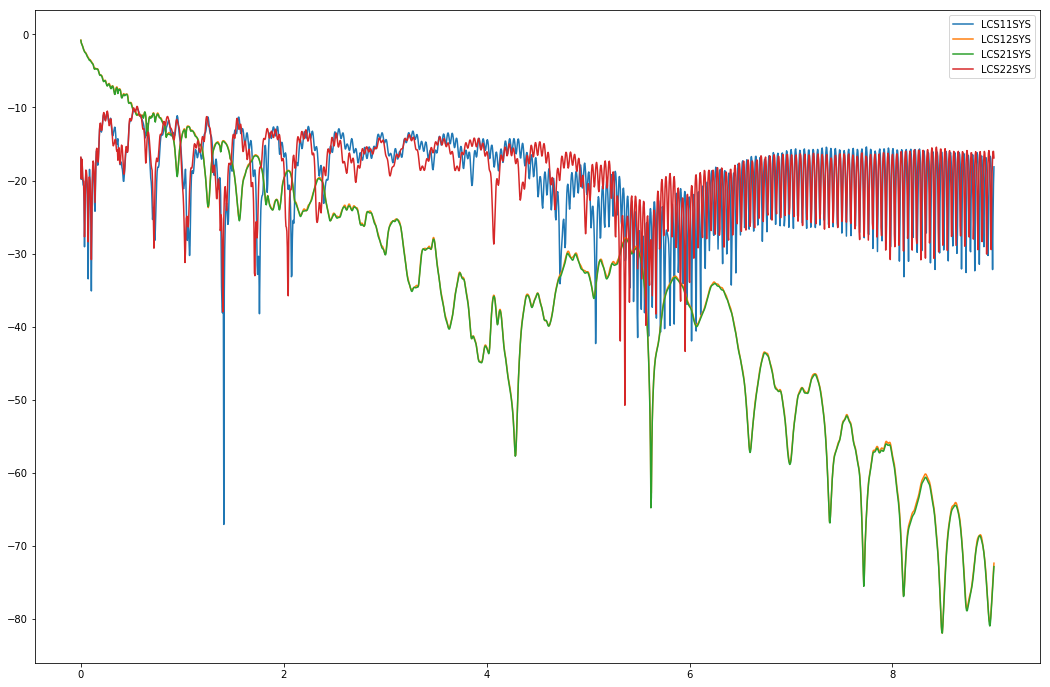

In [9]:
lc_s,lc_lab=experiment_df(file_list[3:7],plot=True)

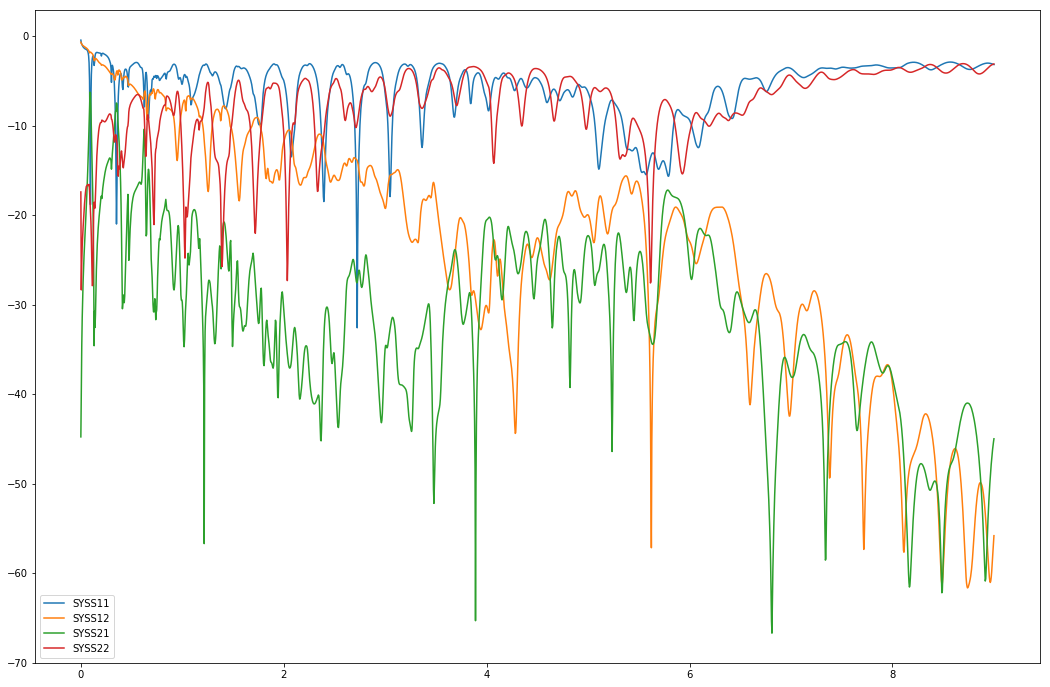

In [10]:
sc_s,sc_lab=experiment_df(file_list[7:],plot=True)

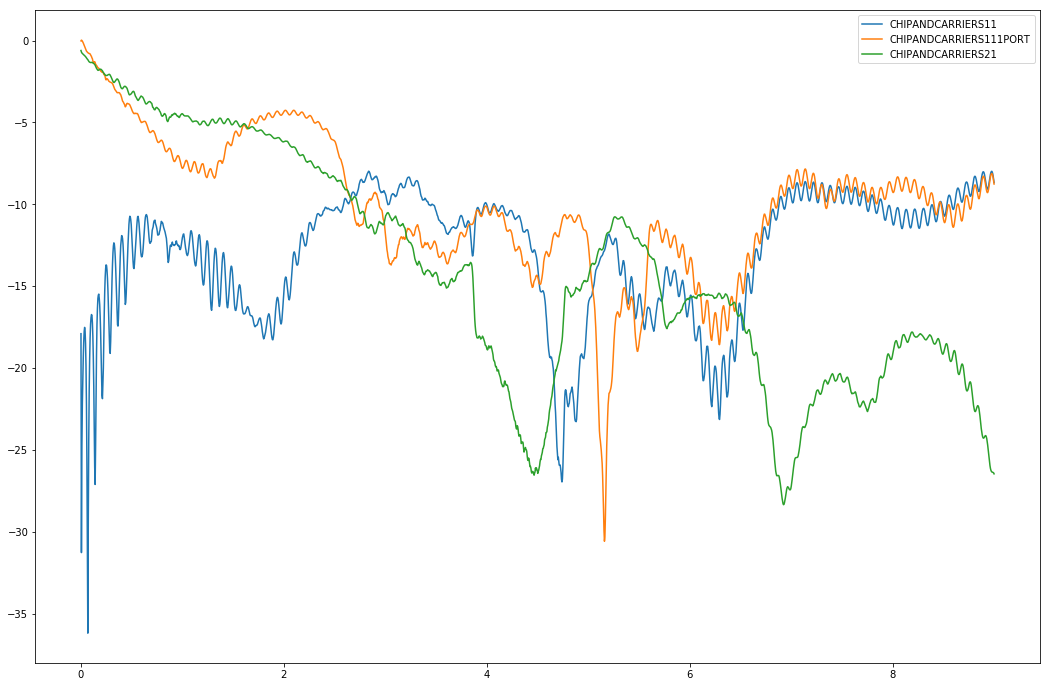

In [11]:
cac_s, cac_lab=experiment_df(file_list[0:3],plot=True)

In [12]:
def pretty_plot(df1,labels,leg_cols=2,y_label=r'S (dB)'):
    df=df1.copy()
    cols=df.columns[1:]
    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=4
    plt.rcParams['figure.figsize'] = (16,9)
    fig=plt.figure();
#     fig.suptitle('Test', fontsize=36, fontweight='bold')
    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)
    ax.set_xlim(0, 9)     # set the xlim to left, right

    for col,l in zip(cols,labels):
        x=df.iloc[:,0]
        y=df[col]
        ax.plot(x,y,label=l);
    leg=ax.legend(ncol=leg_cols,fontsize=30, loc=3, frameon=False, handlelength=1);
    for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
        
    return fig

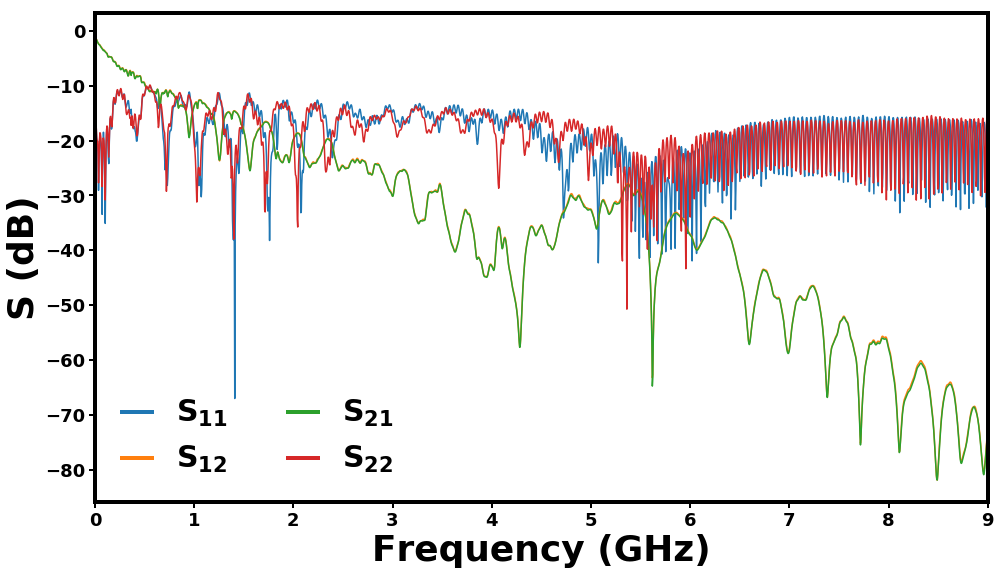

In [13]:
labels=['S$_{11}$','S$_{12}$','S$_{21}$','S$_{22}$']
fig1=pretty_plot(lc_s,labels)
fname='long cable'
fig1.savefig(fname,dpi=600, bbox_size='tight',transparent=True)

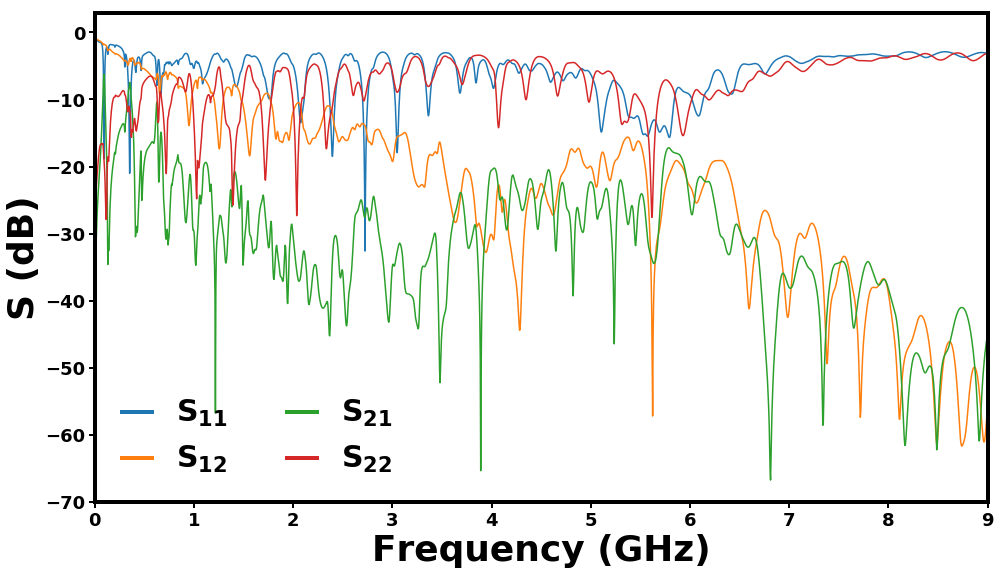

In [14]:
labels=['S$_{11}$','S$_{12}$','S$_{21}$','S$_{22}$']
fig2=pretty_plot(sc_s,labels)
fname='short cable'
fig2.savefig(fname,dpi=600, bbox_size='tight',transparent=True)

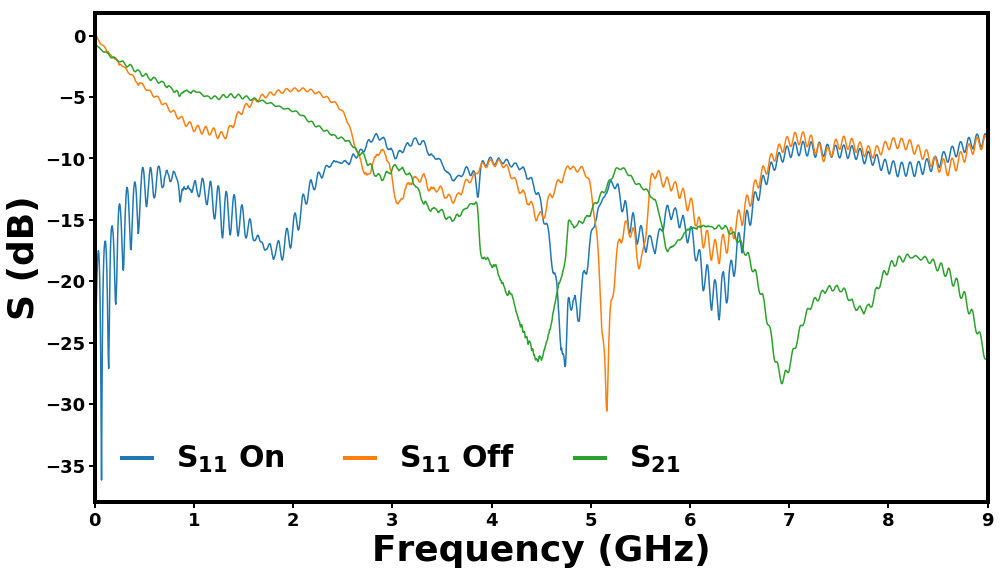

In [15]:
labels=['S$_{11}$ On','S$_{11}$ Off','S$_{21}$']
cac_s.columns = ['Freq(Hz)', 'S11 (dB) On', 'S11 (dB) Off', 'S22 (dB)']
fig3=pretty_plot(cac_s,labels,leg_cols=3)
fname='Chip and Carrier'
fig3.savefig(fname,dpi=600, bbox_size='tight',transparent=True)

In [16]:
all_df.columns

Index(['Freq(GHz)', 'CHIPANDCARRIERS11', 'CHIPANDCARRIERS111PORT',
       'CHIPANDCARRIERS21', 'LCS11SYS', 'LCS12SYS', 'LCS21SYS', 'LCS22SYS',
       'SYSS11', 'SYSS12', 'SYSS21', 'SYSS22'],
      dtype='object')

In [17]:
nums=[0,8,1]
fig_cols1=all_df.columns[nums]
fig_df1=all_df[fig_cols1]
fig_df1.head()

,Freq(GHz),SYSS11,CHIPANDCARRIERS11
0,0.000100,-0.435361,-17.896021
1,0.004602,-0.739012,-31.260218
2,0.009104,-0.881541,-24.768244
3,0.013607,-1.008044,-22.174063
4,0.018109,-1.110642,-20.611834


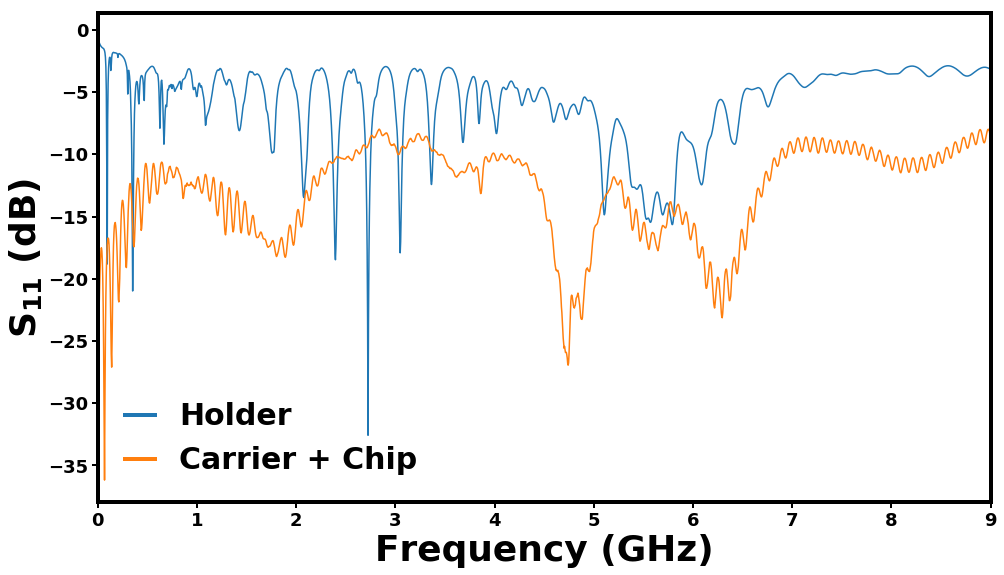

In [18]:
labels=['Holder','Carrier + Chip']
fig4=pretty_plot(fig_df1,labels,leg_cols=1,y_label='S$_{11}$ (dB)')
fname='Figure 1'
fig4.savefig(fname,dpi=600, bbox_size='tight',transparent=True)

In [19]:
nums=[0,9,3]
fig_cols2=all_df.columns[nums]
fig_df2=all_df[fig_cols2]
fig_df2.head()

,Freq(GHz),SYSS12,CHIPANDCARRIERS21
0,0.000100,-0.667112,-0.610300
1,0.004602,-0.817008,-0.705351
2,0.009104,-0.890051,-0.760244
3,0.013607,-0.958868,-0.791852
4,0.018109,-1.019084,-0.815495


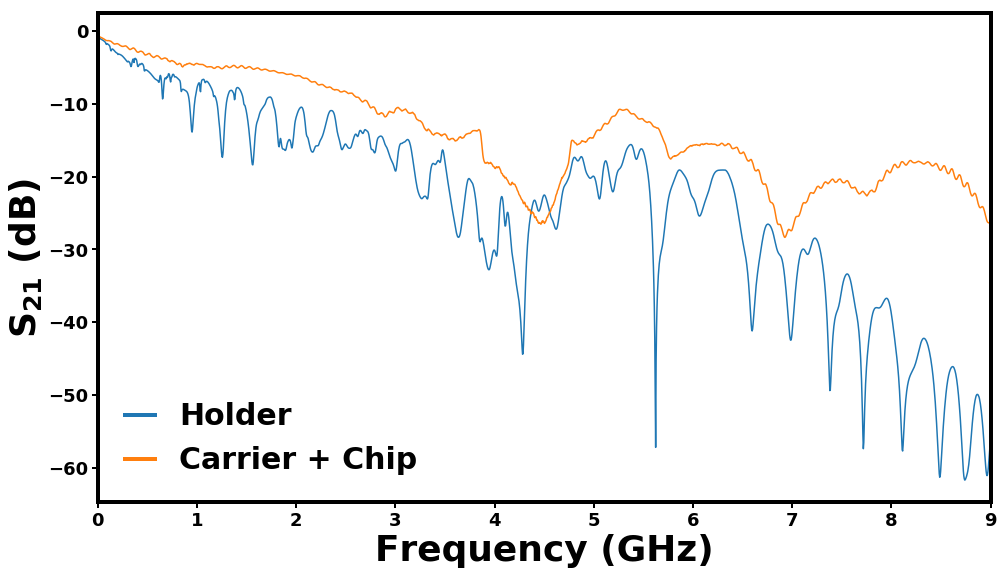

In [20]:
labels=['Holder','Carrier + Chip']
fig5=pretty_plot(fig_df2,labels,leg_cols=1,y_label='S$_{21}$ (dB)')
fname='Figure 2'
fig5.savefig(fname,dpi=600, bbox_size='tight',transparent=True)

In [21]:
def db_to_num(db):
    exp=db/10
    return 10**exp
def num_to_db(num):
    return 10*np.log10(num)

In [22]:
## Make a 2 frame figure
fig_df=pd.merge(fig_df1,fig_df2)
fig_df['SYS_Loss']=(1-db_to_num(fig_df.SYSS11)-db_to_num(fig_df.SYSS12)).dropna()*100
fig_df['Chip_Loss']=(1-db_to_num(fig_df.CHIPANDCARRIERS11)-db_to_num(fig_df.CHIPANDCARRIERS21))*100
fig_df.head()

,Freq(GHz),SYSS11,CHIPANDCARRIERS11,SYSS12,CHIPANDCARRIERS21,SYS_Loss,Chip_Loss
0,0.000100,-0.435361,-17.896021,-0.667112,-0.610300,-76.222327,11.486672
1,0.004602,-0.739012,-31.260218,-0.817008,-0.705351,-67.203934,14.916187
2,0.009104,-0.881541,-24.768244,-0.890051,-0.760244,-63.098728,15.725166
3,0.013607,-1.008044,-22.174063,-0.958868,-0.791852,-59.474538,16.061263
4,0.018109,-1.110642,-20.611834,-1.019084,-0.815495,-56.519266,16.251255


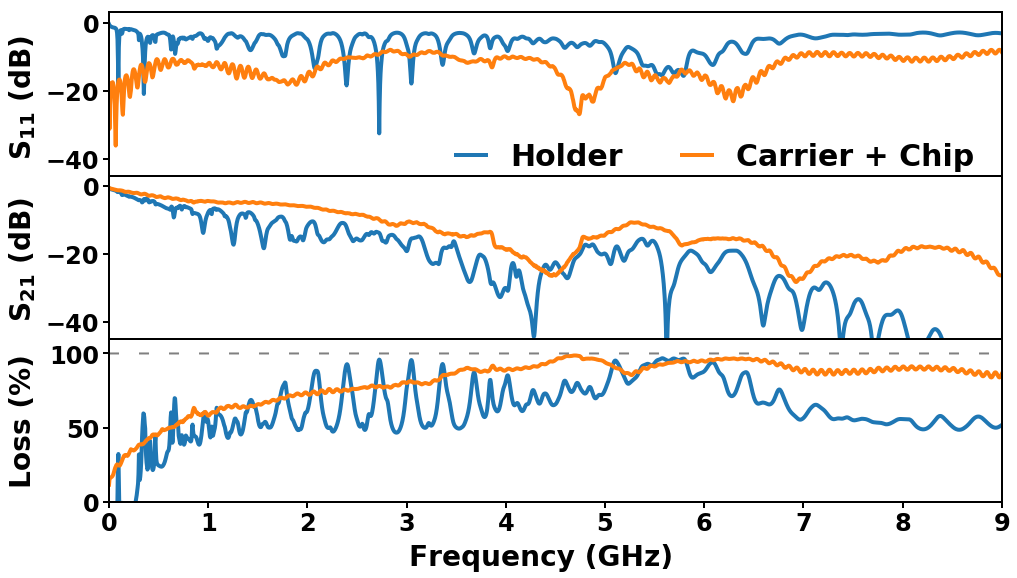

In [23]:
cols=fig_df.columns[1:]
labels=['Holder','Carrier + Chip','Holder','Carrier + Chip']
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

# Three subplots sharing both x/y axes
fig_fin, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
font_size=28
fig_fin.text(0.5, 0.04, 'Frequency (GHz)', ha='center', va='center', fontsize=font_size, fontweight='bold')
fig_fin.text(0.05, 0.75,r'S$_{11}$ (dB)', ha='center', va='center', rotation='vertical', fontsize=font_size, fontweight='bold')
fig_fin.text(0.05, 0.5,r'S$_{21}$ (dB)', ha='center', va='center', rotation='vertical', fontsize=font_size, fontweight='bold')
fig_fin.text(0.05, 0.25,r'Loss (%)', ha='center', va='center', rotation='vertical', fontsize=font_size, fontweight='bold')

ax1.set_xlim(0,9)
ax1.set_ylim(-45,3)
    
ax1.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)

ax2.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax2.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
ax2.set_ylim(-45,3)
ax2.set_xlim(0,9)

ax3.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax3.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
ax3.set_ylim(0,110)
ax3.set_xlim(0,9)
fig_fin.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig_fin.axes[:-1]], visible=False)

a=0
colors=['b']
for col,l in zip(cols,labels):

    x=fig_df.iloc[:,0]
    y=fig_df[col]
    if a>1:
        ax2.plot(x,y,linewidth=4,label=l);
    else:
        ax1.plot(x,y,linewidth=4,label=l);
    a+=1
fig_df_dn=fig_df.dropna().copy()
x1=fig_df_dn.iloc[:,0]
y1=fig_df_dn.SYS_Loss
y2=fig_df.Chip_Loss
ax3.plot(x1,y1, linewidth=4,label='Holder')
ax3.plot(x,y2, linewidth=4,label='Carrier + Chip')
ax3.plot(x,np.ones_like(x)*100, linewidth=2, linestyle=(0, (5, 10)),color='gray')
leg=ax1.legend(ncol=2,fontsize=30, loc=(0.375,-.05), frameon=False, handlelength=1);
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
# leg=ax2.legend(ncol=2,fontsize=30, loc=3, frameon=False, handlelength=1);
# for legobj in leg.legendHandles:
#         legobj.set_linewidth(4.0)
# leg=ax3.legend(ncol=2,fontsize=30, loc=2, frameon=False, handlelength=1);
# for legobj in leg.legendHandles:
#         legobj.set_linewidth(4.0)
fname='Figure X_1_%'
fig_fin.savefig(fname,dpi=600,bbox='tight',transparent=True)

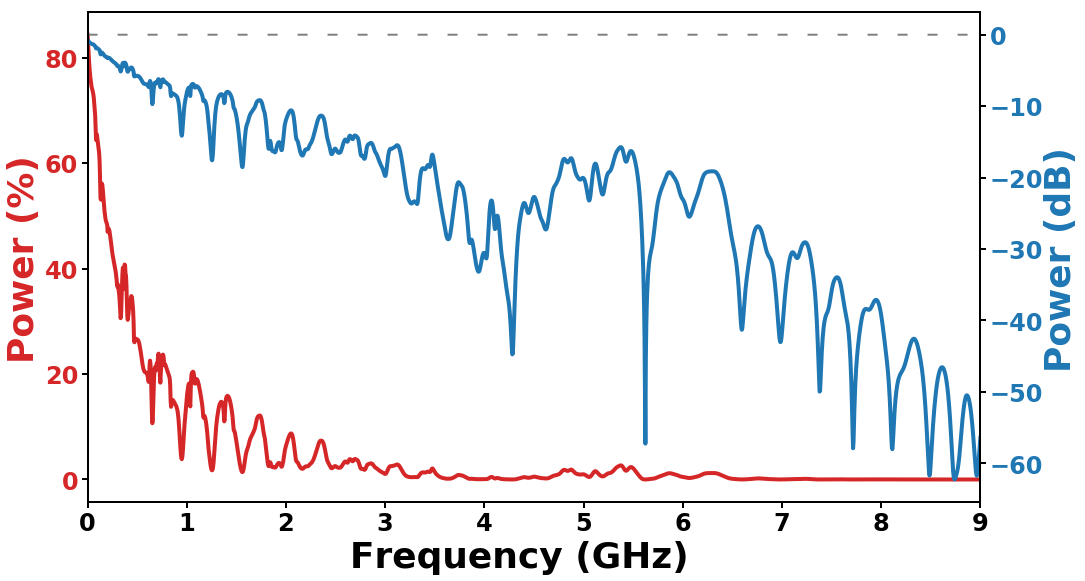

In [27]:
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)
fig, ax1 = plt.subplots()

power_db=num_to_db(db_to_num(fig_df.SYSS12)-db_to_num(fig_df.SYSS12).multiply(db_to_num(fig_df.CHIPANDCARRIERS11)))
power_perc=(db_to_num(fig_df.SYSS12)-db_to_num(fig_df.SYSS12).multiply(db_to_num(fig_df.CHIPANDCARRIERS11)))*100

color = 'tab:red'
font_size=36
fig.text(0.5, 0.04, 'Frequency (GHz)', ha='center', va='center', fontsize=font_size, fontweight='bold')
fig.text(0.07, 0.5,r'Power (%)', ha='center', va='center', rotation='vertical', fontsize=font_size, fontweight='bold', color=color)
ax1.plot(x, power_perc, linewidth=4, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)

ax1.set_xlim(0,9)
# ax1.set_ylim(-45,3)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
fig.text(0.97, 0.5,r'Power (dB)', ha='center', va='center', rotation='vertical', fontsize=font_size, fontweight='bold', color=color)
ax2.plot(x, power_db, linewidth=4, color=color)
ax2.plot(x,np.zeros_like(x), linewidth=2, linestyle=(0, (5, 10)),color='gray')
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax2.set_xlim(0,9)
# ax1.set_ylim(-3,85)
fname='Figure X_2'
fig.savefig(fname,dpi=600,bbox='tight',transparent=True)


In [26]:
os.getcwd()

'C:\\Users\\kbs1\\Documents\\Holder_Carrier_VNA_Measurements NEW'

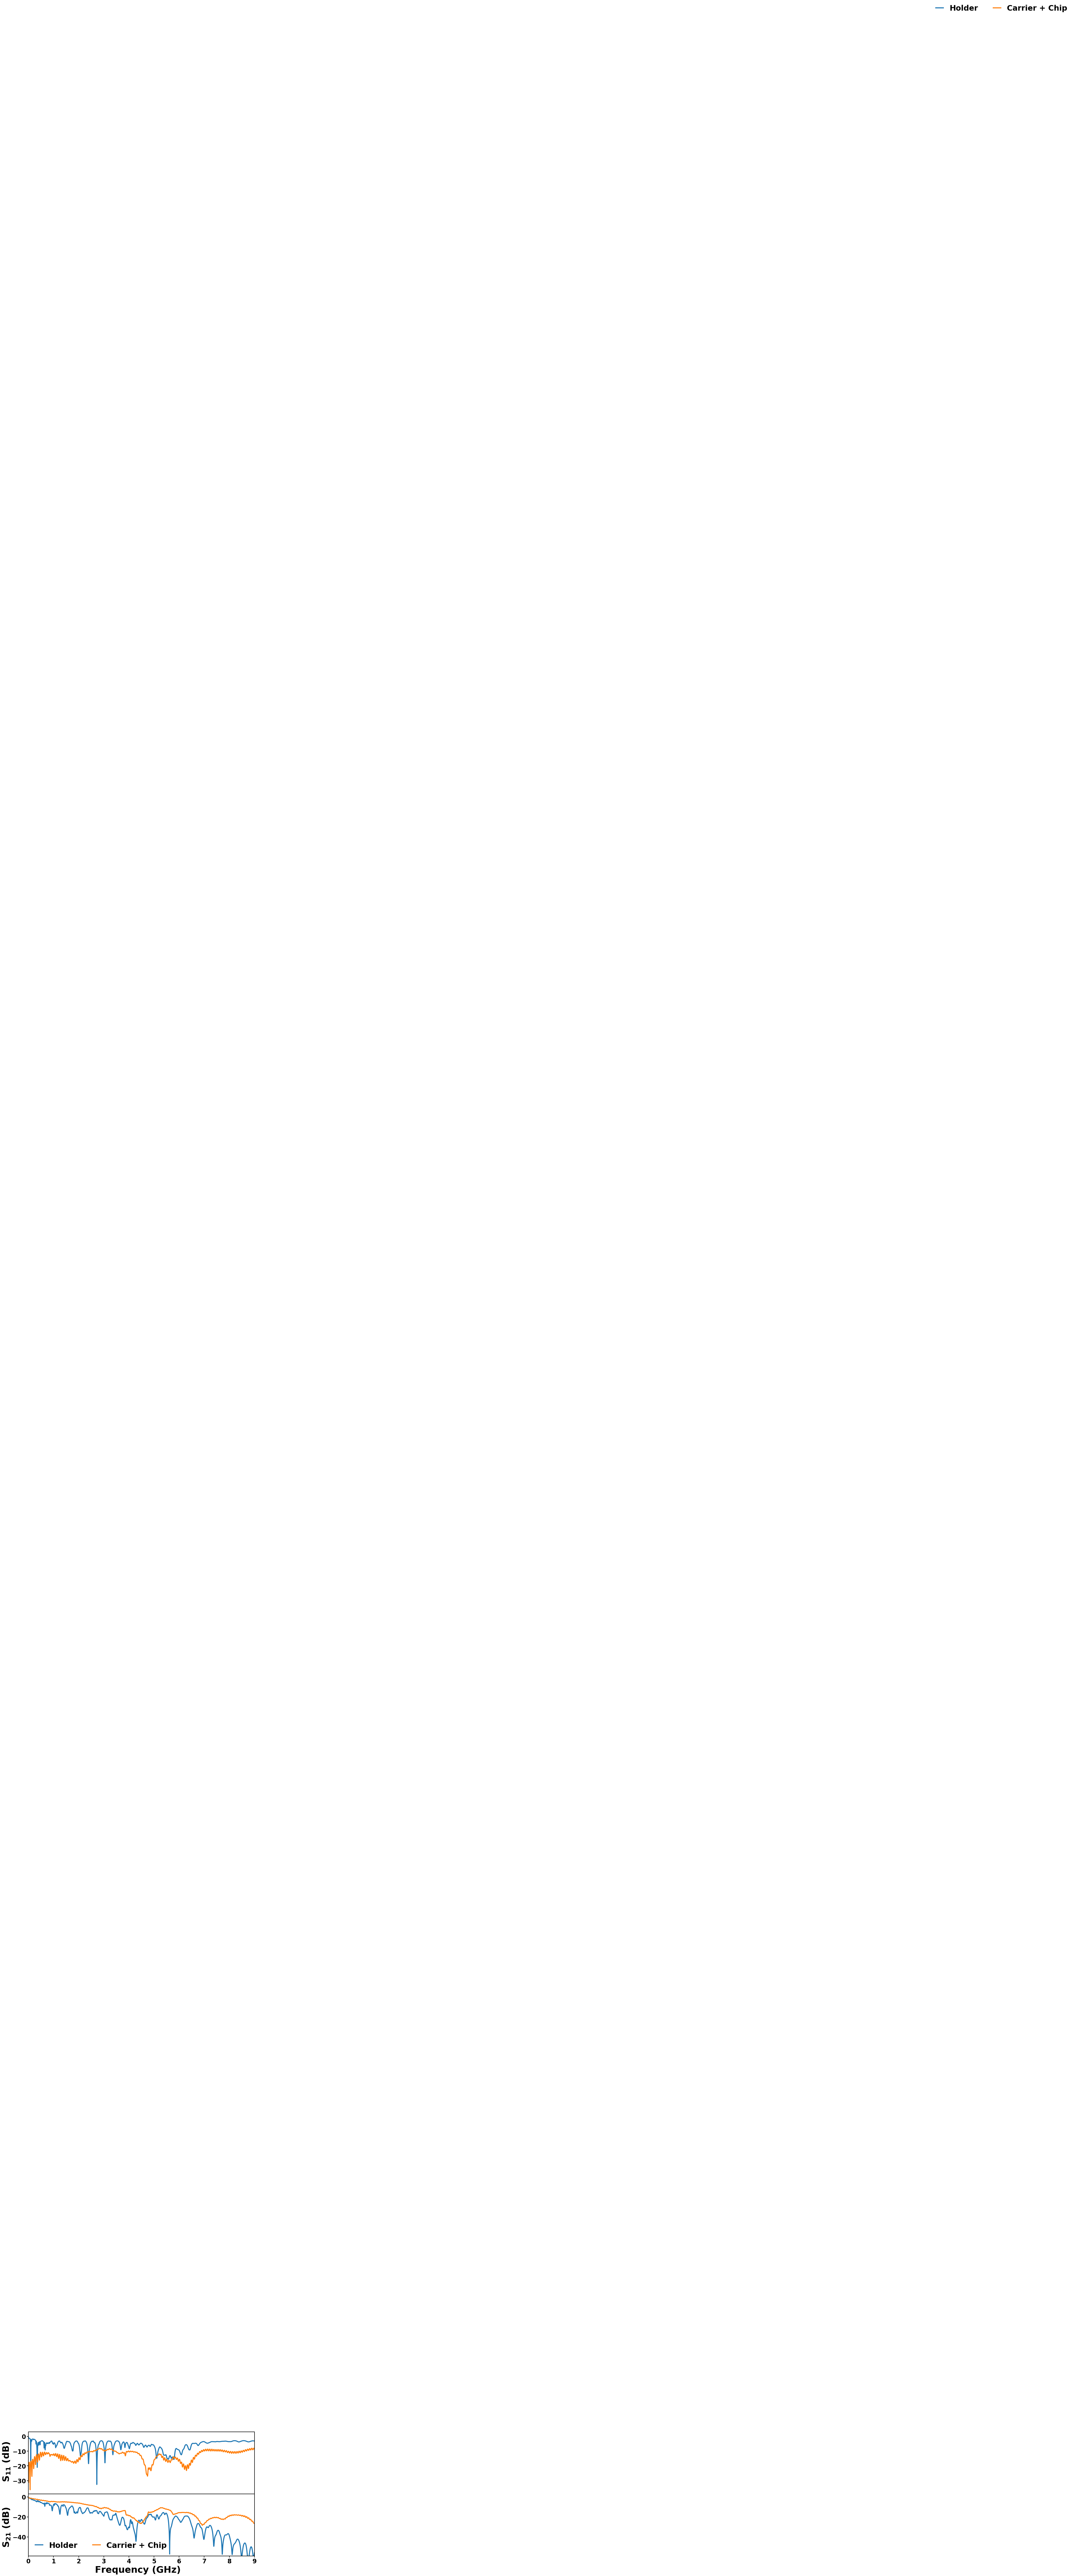

In [25]:
cols=fig_df.columns[1:]
labels=['Holder','Carrier + Chip','Holder','Carrier + Chip']
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

# Three subplots sharing both x/y axes
fig_fin, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

fig_fin.text(0.5, 0.04, 'Frequency (GHz)', ha='center', va='center', fontsize=36, fontweight='bold')
fig_fin.text(0.05, 0.70,r'S$_{11}$ (dB)', ha='center', va='center', rotation='vertical', fontsize=36, fontweight='bold')
fig_fin.text(0.05, 0.30,r'S$_{21}$ (dB)', ha='center', va='center', rotation='vertical', fontsize=36, fontweight='bold')

ax1.set_xlim(0,9)
ax1.set_ylim(-39,3)
    
ax1.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)

ax2.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax2.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
ax2.set_ylim(-59,3)
ax2.set_xlim(0,9)
fig_fin.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig_fin.axes[:-1]], visible=False)

a=0
colors=['b']
for col,l in zip(cols,labels):

    x=fig_df.iloc[:,0]
    y=fig_df[col]
    if a>1:
        ax2.plot(x,y,linewidth=4,label=l);
    else:
        ax1.plot(x,y,linewidth=4,label=l);
    a+=1
leg=ax1.legend(ncol=2,fontsize=30, loc=(4,40), frameon=False, handlelength=1);
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
leg=ax2.legend(ncol=2,fontsize=30, loc=3, frameon=False, handlelength=1);
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
fname='Figure X'
fig_fin.savefig(fname,dpi=600,bbox='tight',transparent=True)